In [3]:
!pip -q install git+https://github.com/mikekestemont/copia.git@feature/coverage-based-rarefaction


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd

from copia.data import to_copia_dataset

In [ ]:
#This function aThis function allows you to make a dataset object based on counts or observations (in our case, probably counts):
#Allows you to make a dataset object based on counts or observations (in our case, probably counts):

In [41]:
import pandas as pd
import bambi as bmb
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv("../data/df_indi_works_occupations.csv", index_col=0)
print(df.occupation.value_counts())

regions = pd.read_csv(
    "../data/ENS - Cultural Index - Countries Databases - region_level.csv"
)
regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"
regions = regions[regions["level"] == 2]
regions = regions[regions["region_name"] != "Balkans"]
regions = regions[
    regions["region_name"] != "Eastern Europe"
]  # remove because it takes East Slavic and Central Europe
regions = set(regions["region_name"])
df = df[df["region_name"].isin(regions)]

df["century"] = df["decade"].round(-2)

# Avoid overlapping with Antiquity

df = df[~((df["region_name"] == "Italy") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Italy") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Portugal") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Spain") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Arabic world") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Balkans") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "France") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "United Kingdom") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Low countries") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "East Slavic") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Central Europe") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Eastern Europe") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "German world") & (df["decade"] < 500))]
df = df[~((df["region_name"] == "Latin world") & (df["decade"] > 500))]


df["count"] = df["count_works"]
df_m = df.copy()
df_m = df_m[df_m["count"].isin({0, 1, 2})]  # Not more ?
df_m['count_works'][df_m['count_works']==0] = 1

#df_m["y"] = df_m["count"].map({0: 0, 1: 0, 2: 1})



df_test = df_m[df_m['region_name']=='France']
df_test = df_test[['individual_wikidata_id', 'count_works', 'region_name']].drop_duplicates()
df_test['count_works'] = df_test['count_works'].astype(int)
df_test

occupation
Written work    125054
Work of art     115210
Science          65822
Music            48289
Sculpture        27231
Architecture     24493
Theater          11977
Name: count, dtype: int64


,individual_wikidata_id,count_works,region_name
12,Q3568446,1,France
47,Q2861953,1,France
62,Q923557,1,France
118,Q3430952,1,France
122,Q5954623,1,France
...,...,...,...
418143,Q3384589,1,France
418165,Q3136089,1,France
418176,Q15407046,1,France
418183,Q330515,1,France


In [26]:
ds = to_copia_dataset(df_test, data_type='abundance', input_type='counts',index_column='individual_wikidata_id', count_column='count_works')
from copia.rarefaction_extrapolation import species_accumulation

acc = species_accumulation(ds, step_size=10, compute_coverage=True)
acc = acc.reset_index()


In [42]:
acc

,steps,est,lci,uci,coverage,interpolated
0,1,1.00,1.00,1.00,0.00,True
1,11,11.00,11.00,11.00,0.00,True
2,21,21.00,21.00,21.00,0.00,True
3,31,31.00,31.00,31.00,0.00,True
4,41,40.99,40.99,40.99,0.00,True
...,...,...,...,...,...,...
3343,33431,29575.93,29350.11,29816.28,0.23,False
3344,33441,29583.68,29357.73,29824.13,0.23,False
3345,33451,29591.42,29365.35,29831.99,0.23,False
3346,33461,29599.16,29372.97,29839.84,0.23,False


<Axes: xlabel='steps'>

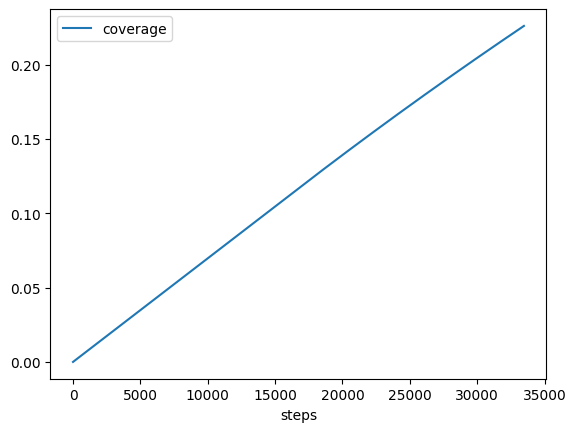

In [43]:
acc.plot(x='steps', y = 'coverage')

In [45]:
query = """<|im_start|>user\nQuels sont les dispositifs de déductions fiscales disponibles pour les entreprises implantées dans certaines zones ?\nReferences :\n85da7a1b56c0d9de_0 : Exonérations en zones de restructuration de la défense (ZRD) Une entreprise installée dans une zone de restructuration de la défense (ZRD) peut bénéficier de plusieurs exonérations fiscales et sociales. Vous devez consulter la liste officielle des ZRD pour savoir si votre entreprise se trouve dans un territoire concerné. Voici une liste de différents cas possibles:\n- Impôt sur le revenu (IR) et impôt sur les sociétés (IS)\n- Cotisation foncière des entreprises (CFE)\n- Taxe foncière sur les propriétés bâties\n- Cotisations patronales \n\n5a151bc8aa551ceb_0 : Exonérations en zones de restructuration de la défense (ZRD) Impôt sur le revenu (IR) et impôt sur les sociétés (IS). Démarche. L’établissement doit fournir la preuve qu'il exerce une activité économique réelle dans la zone. Il doit pour cela fournir des éléments d'exploitation. Par exemple : loyers, salaires, factures d'achats de produits ou la preuve de stocks de marchandises en lien avec l'activité. Ces documents doivent être transmis à l'administration fiscale lors de la déclaration annuelle de résultats. Vous devez joindre à votre déclaration de résultats une déclaration spéciale et remplir les éléments nécessaires qui ouvrent un droit à cette exonération fiscale. \n\nff7af464559274d7_0 : Exonérations d'impôts en zone de revitalisation rurale (ZRR) Exonération de l'impôt sur le revenu ou de l'impôt sur les sociétés. Entreprises concernées. L'exonération d'impôt sur le revenu ou d'impôt sur les sociétés est accordée à une entreprise créée ou reprise avant le 31 décembre 2023 et qui respecte les 5 conditions suivantes :\n- Exercer une activité industrielle, commerciale, artisanale ou libérale\n- Avoir son siège social et ses activités situés dans une ZRR\n- Être sous le régime réel d'imposition\n- Avoir moins de 11 salariés en CDI ou en CDD de 6 mois minimum\n- Avoir moins de 50 % de son capital détenu par d'autres sociétés\n(Rappel: Les micro-entrepreneurs sont exclus de cette exonération. Ils ne sont pas sous le régime réel d'imposition mais sous le régime fiscal de la micro-entreprise .) Si l'entreprise réalise plus de 25 % de son CA (chiffre d'affaires) en dehors de la ZRR, la part qui dépasse ces 25 % est imposée. (Exemple: Une société de transport routier de marchandises peut bénéficier du dispositif d'exonération d'impôt si le lieu de stationnement habituel des véhicules, le lieu d'implantation des installations d'entretien et celui de la direction effective sont situés en ZRR. Il faut également tenir du compte du prorata de chiffre d’affaires réalisé dans la ZRR. Pour le calcul du chiffre d’affaires effectivement réalisé en ZRR , il faut considérer le lieu de réalisation de la prestation de service. Pour des activités de transport de marchandises, le lieu de réalisation de la prestation de service est localisé en ZRR si le lieu de chargement et /ou de livraison est situé en ZRR.) \n\nff532e5befb78a9e_0 : Exonérations d'impôts en zone de revitalisation rurale (ZRR) Une entreprise située ou qui souhaite s'implanter dans une zone de revitalisation rurale (ZRR) bénéficie d'exonérations fiscales sous certaines conditions. Ces critères sont liés notamment à l'effectif de ses salariés et à la nature de l'activité exercée. Ce dispositif est prolongé jusqu'au 31 décembre 2023. Les demandes d'exonération peuvent être faites jusqu'à cette date. Pour savoir si votre entreprise est située dans une ZRR, vous pouvez consulter la carte des zones concernées. Voici une liste de différents cas possibles:\n- Exonération de l'impôt sur le revenu ou de l'impôt sur les sociétés\n- Cotisation foncière des entreprises (CFE)\n- Taxe foncière sur les propriétés bâties (TFPB)\n- Taxe d'habitation sur les résidences secondaires \n\n4817ecdfffe51a7d_0 : Exonérations sur les bénéfices en zone franche urbaine-territoire entrepreneur (ZFU-TE) Une entreprise qui s'implante et embauche une main-d'œuvre locale dans une zone franche urbaine - territoire entrepreneurs (ZFU-TE) , peut bénéficier d'exonérations fiscales sous certaines conditions. Ce dispositif est valable jusqu'au 31 décembre 2023. Les règles diffèrent selon la date d'implantation de l'entreprise : à partir de 2016 ou en 2015 ou avant 2015. Voici une liste de différents cas possibles:\n- Votre entreprise est-elle située en ZFU ? - Quelle entreprise est concernée par l'exonération sur les bénéfices ? - Conditions liées à l'embauche de salariés\n- Montant et durée de l'exonération\n- Démarches\n- Quelle entreprise est concernée ?<|im_end|>\n<|im_start|> assistant\n"""
print(query)

<|im_start|>user
Quels sont les dispositifs de déductions fiscales disponibles pour les entreprises implantées dans certaines zones ?
References :
85da7a1b56c0d9de_0 : Exonérations en zones de restructuration de la défense (ZRD) Une entreprise installée dans une zone de restructuration de la défense (ZRD) peut bénéficier de plusieurs exonérations fiscales et sociales. Vous devez consulter la liste officielle des ZRD pour savoir si votre entreprise se trouve dans un territoire concerné. Voici une liste de différents cas possibles:
- Impôt sur le revenu (IR) et impôt sur les sociétés (IS)
- Cotisation foncière des entreprises (CFE)
- Taxe foncière sur les propriétés bâties
- Cotisations patronales 

5a151bc8aa551ceb_0 : Exonérations en zones de restructuration de la défense (ZRD) Impôt sur le revenu (IR) et impôt sur les sociétés (IS). Démarche. L’établissement doit fournir la preuve qu'il exerce une activité économique réelle dans la zone. Il doit pour cela fournir des éléments d'exploi

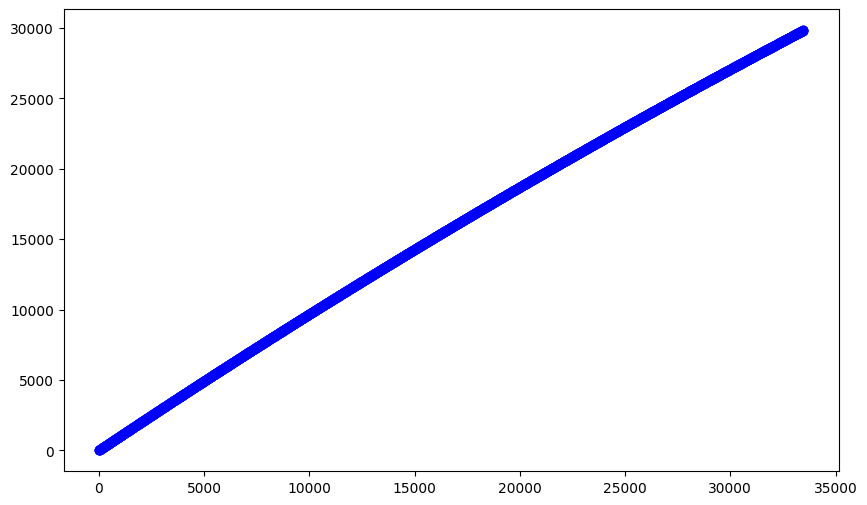

In [34]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(list(acc['steps']), list(acc['uci']), marker='o', linestyle='-', color='b')

In [ ]:
#This function allows you to make a dataset object based on counts or observations (in our case, probably counts):
ds = to_copia_dataset(X, input_type="counts”)

In [ ]:
#Then, the rarefaction_extrapolation module contains a function called rarefaction_extrapolation:


In [ ]:






from copia.rarefaction_extrapolation import rarefaction_extrapolation_curve

Use this to compute interpolated and extrapolated richness values. Make sure to switch “compute_coverage” to True to also compute the coverage at each level:

acc = rarefaction_extrapolation_curve(ds, step_size=10, compute_coverage=True)